# CQF Exam 3: Machine Learning

## What are voting classifiers in ensemble learning?

Voting classifiers, in particular, are used for classification tasks and are based on the idea of aggregating the predictions of multiple classifiers to make a final decision. There are two main types of voting classifiers:

1. Hard Voting Classifier:
    In a hard voting classifier, each individual base model (classifier) in the ensemble predicts the class label for a given input. The final prediction is determined by a majority vote among these individual predictions.
2. Soft Voting Classifier:
   In a soft voting classifier, each individual base model predicts the probability or confidence scores for each class. The final prediction is calculated by averaging these probabilities across all the base models and selecting the class with the highest average probability.

## Explain the role of the regularization parameter $C$ in a Support Vector Machine (SVM) model. How does varying $C$ affect the model’s bias and variance trade-off?


Consider the mathematical equation for the solf margin of non linearly separable data $\mathbf{x}_n$, $y_n$:

$$
\begin{array}
{rl}{\min_{w,b,\xi}}&{{\frac{1}{2}}\|{\mathbf{w}}\|^{2} + C \sum_{n=1}^{N}\xi_{n}}
\\\\
{{\mathrm{subject\;to}}}&{y_{n}(\langle{\mathbf{w}},{\mathbf{x}}_{n}\rangle + b)\geqslant1-\xi_{n}}
\\\\
{{}}&{{}\xi_{n}\geqslant0}
\end{array}
$$

Where:
- $w$ is the normal vector of the hyper plane,
- $\mathbf{x}_n$ is the feature vector $n^{th}$
- $y_n$ is the label $n^{th}$
- $\xi_n$ is the slack term that measures the distance of a positive example $x_{+}$ to the positive margin hyperplane $(\langle{\mathbf{w}, \mathbf{x}}\rangle + b = 1)$ when $x_{+}$ is on the wrong side.

The parameter $C > 0$ trades off the size of the margin and the total amount of slack that we have. A large value of $C$ implies low regularization, as we give the slack variables larger weight, hence giving more priority to examples that do not lie on the correct side of the margin.

Let take a look at the impact of $C$ in the model using the breast cancer data from `Scikit-Learn` library.

In [2]:
import pandas as pd 
import numpy as np 
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.datasets import load_breast_cancer 
from sklearn.svm import SVC 
import warnings
warnings.filterwarnings("ignore")

cancer = load_breast_cancer() 

# The data set is presented in a dictionary form: 
print(cancer.keys()) 


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


Now we will extract all features into the new data frame and our target features into separate data frames.

In [3]:
df_feat = pd.DataFrame(cancer['data'], 
					columns = cancer['feature_names']) 

# cancer column is our target 
df_target = pd.DataFrame(cancer['target'], 
					columns =['Cancer']) 

print("Feature Variables: ") 
print(df_feat.info()) 


Feature Variables: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smooth

We will split the training data and the test data using 70:30 ratio

In [4]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split( 
						df_feat, np.ravel(df_target), 
				test_size = 0.30, random_state = 101) 


And fit the data to our SVC model. After that we can see the hyperparameters of our model using `get_param()` method.

In [5]:
# train the model on train set 
model = SVC() 
model.fit(X_train, y_train) 

SVC()

In [6]:
model.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

The default value of $C$ is 1. Now we can observe the model performace using the confusion matrix.

In [7]:
# print prediction results 
predictions = model.predict(X_test) 
print(classification_report(y_test, predictions)) 

              precision    recall  f1-score   support

           0       0.95      0.85      0.90        66
           1       0.91      0.97      0.94       105

    accuracy                           0.92       171
   macro avg       0.93      0.91      0.92       171
weighted avg       0.93      0.92      0.92       171



Let's change the value of $C=0.001$ and see the result.

In [8]:
# train the model on train set 
model = SVC(C=0.001) 
model.fit(X_train, y_train) 
# print prediction results 
predictions = model.predict(X_test) 
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        66
           1       0.61      1.00      0.76       105

    accuracy                           0.61       171
   macro avg       0.31      0.50      0.38       171
weighted avg       0.38      0.61      0.47       171



### Conclusion

When $C$ is set to a small value (e.g., close to 0), the SVM places a higher emphasis on maximizing the margin and finding the hyperplane that separates the data points with as few errors as possible. In this case, the model is more tolerant of misclassifications (training errors) and is willing to accept a wider margin with a few support vectors. The model's bias is higher, as it tends to underfit the training data by allowing more training errors, but the variance is lower because it maintains a simpler decision boundary.

When $C$ is set to a large value, the SVM imposes a stronger penalty on misclassified points and strives to minimize training errors, even if it means having a narrower margin and more support vectors. The model's bias is lower because it tries to fit the training data as closely as possible, potentially leading to a more complex decision boundary. However, the variance is higher because the model is sensitive to individual data points, which can result in overfitting.

## Produce a model to predict positive moves (up trend) using machine learning model.

The 7 steps of Machine Learning (ML) workflow:

| Step | Workflow                  | Remark                                                      |
| ---- | ------------------------- | ----------------------------------------------------------- |
| 1    | Ideation                  | Predict positive moves from the given dataset               |
| 2    | Data Collection           | Download the data from Yahoo Finance and store the data set |
| 3    | Exploratory Data Analysis | Study summary statistics                                    |
| 4    | Cleaning Dataset          | Trying to resolve the missing data                          |
| 5    | Transformation            | Perform feature scaling based on EDA                        |
| 6    | Modeling                  | Building and training classification model                  |
| 7    | Metrics                   | Validating the model performance                            |

### STEP 1: Ideation

The objective of the exam is to produce a model to predict a up and down move of the underlying. This is a classification problem, therefore we will tackle this using a classification label `[0]` for a down trend and `[1]` for the up trend. We will use FTSE 100 ticker for this example and using the data from `2007-10-16` to `2023-10-16`. The reason why I pick the data from this range is because it covers the 2008 financial crash and also 2020 COVID-19 recession.

We are working with the financial timeseries, so the workflow is quite straightforward. After download and store the data, we will explore the data to spot any outliers, create the label and check for imbalance classes. Using features engineering techniques to create new features from the original data and pick the most important feature for our model.

Then we will split the `train` and `test` set, fit and transform the train set and then transform the test set. Doing this will help us avoiding any data leakage.

We will use the confusion matrix and AUC-ROC curve to measure our model performance.

In [9]:
# Data pulling
import yfinance as yf

# Technical analysis
import pandas_ta as ta 

# import boruta
from boruta import BorutaPy

# Plotting
import matplotlib.pyplot as plt

# Preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import (
    train_test_split,
    RandomizedSearchCV,
    TimeSeriesSplit,
    cross_val_score
)

# import classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier, plot_importance, to_graphviz

# Metrics
from sklearn.metrics import (
    precision_recall_curve,
    roc_curve,
    RocCurveDisplay,
    ConfusionMatrixDisplay
)
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    recall_score,
    precision_score,
    roc_auc_score,
    auc
)

from sklearn.metrics import (
    classification_report,
    confusion_matrix
)


### STEP 2: Data Collection

We will use `yfinance` package to download the daily trading data from Yahoo Finance. The recommending data should cover 5 years period which is sufficient. The data is saved in the `.csv` format and can be used later under the name `FTSE1D.csv`.

In [10]:
# Download data for TSLA and store as csv file
ftse = yf.download("^FTSE", start = '2000-10-16', end = '2023-10-16' , interval='1D')
ftse.to_csv('FTSE1D.csv')

[*********************100%%**********************]  1 of 1 completed


In [11]:
ftse = pd.read_csv('../module_4/FTSE1D.csv')

In [12]:
# Verify the downloaded data
ftse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5808 entries, 0 to 5807
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5808 non-null   object 
 1   Open       5808 non-null   float64
 2   High       5808 non-null   float64
 3   Low        5808 non-null   float64
 4   Close      5808 non-null   float64
 5   Adj Close  5808 non-null   float64
 6   Volume     5808 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 317.8+ KB


In [13]:
# Check for some missing value and outliers
ftse.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

After retreaving the data, we will use multiple technical indicator provided by `pandas_ta` library to predict the up and down movement of the underlying. After creating the new features using the raw data, we will drop the original data, split the train and test data and then we will explore the training set for feature engineering process.

In [14]:
# Help with the dataframe format for the `pandas_ta` to work properly
ftse.set_index(pd.DatetimeIndex(ftse['Date']), inplace=True, drop=True)
ftse.drop(columns='Date', axis=1, inplace=True)

In [15]:
# Add all indicators
ftse.ta.strategy()

0it [00:00, ?it/s]/Users/baobach/anaconda3/envs/pythonlab/lib/python3.10/multiprocessing/pool.py:48: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return list(map(*args))
131it [00:03, 42.04it/s]


In [16]:
ftse.shape

(5808, 284)

There is no missing data so we can go straight to explore the data and understand the characteristic of the data. Before doing any EDA, it's good practice to split the `train` and `test` set and then doing analysis on the `train` data. This will help us from any bias by including the `test` data.

First thing we want to do before moving forward is to copy our data because you are going to do a lot of transformation and manupulation. This will help us later revert to our original dataset.

In [17]:
# Copy the data
data = ftse.copy()
data.describe()

,Open,High,Low,Close,Adj Close,Volume,ABER_ZG_5_15,ABER_SG_5_15,ABER_XG_5_15,ABER_ATR_5_15,...,VIDYA_14,VTXP_14,VTXM_14,VWAP_D,VWMA_10,WCP,WILLR_14,WMA_10,ZL_EMA_10,ZS_30
count,5808.000000,5808.000000,5808.000000,5808.000000,5808.000000,5.808000e+03,5804.000000,5793.000000,5793.000000,5793.000000,...,5794.000000,5794.000000,5794.000000,5808.000000,5799.000000,5808.000000,5795.000000,5799.000000,5795.000000,5779.000000
mean,6053.630630,6093.194665,6012.897678,6053.859676,6053.859676,1.082316e+09,6052.718354,6132.491489,5971.889599,80.300945,...,6003.882789,1.025699,0.975204,6053.317339,6049.885517,6053.452924,-43.209675,6052.848265,6053.183475,0.133929
std,1068.022713,1065.979397,1070.589893,1068.205824,1068.205824,4.731214e+08,1066.725687,1063.883487,1072.384030,31.915281,...,1104.158332,0.182770,0.167601,1067.955207,1065.145452,1067.975149,30.787304,1065.977311,1069.175429,1.336965
min,3287.000000,3466.399902,3277.500000,3287.000000,3287.000000,8.378200e+06,3433.506657,3527.998478,3339.014835,31.394749,...,107.270275,0.398324,0.453139,3343.633301,3513.007702,3329.474976,-100.000000,3472.869083,3379.172334,-3.942884
25%,5311.900024,5351.274902,5260.425049,5311.900024,5311.900024,7.185838e+08,5295.036711,5387.175079,5208.314267,59.239367,...,5262.681886,0.899390,0.862239,5304.566732,5289.453548,5305.543732,-69.519206,5294.799099,5299.730427,-0.891508
50%,6109.149902,6162.550049,6065.300049,6109.149902,6109.149902,9.322742e+08,6129.276660,6210.305699,6030.701564,74.752470,...,6052.799180,1.023851,0.977079,6112.433268,6121.249724,6112.812561,-39.993928,6129.356321,6118.630531,0.357297
75%,6940.750122,6976.424805,6890.975098,6941.300171,6941.300171,1.413525e+09,6942.086686,7027.990234,6862.091311,94.098674,...,6877.494270,1.149124,1.092582,6936.191732,6932.559922,6938.756226,-14.595492,6940.076309,6939.951002,1.219093
max,8014.299805,8047.100098,7995.500000,8014.299805,8014.299805,4.420947e+09,7994.013314,8057.955344,7930.071284,288.829299,...,7822.879793,1.604487,1.485335,8012.733398,7963.208666,8012.675049,-0.000000,7980.567179,8021.152990,3.570119


We set the target variable is whether `FTSE` price will close up or down on the next trading day. If the tomorrow’s closing price is greater than today’s closing price by `2.5%`, then we will buy the `FTSE`, else we will sell `FTSE`.

We assign a value of `1` for the buy signal and `0` otherwise to target variable. The target can be described as:

$$
y_t = 
\begin{cases} 
1, & \text{If} \quad p_{t+1} > 1.0025 \times p_t  \\ 
0, & \text{Otherwise}
\end{cases}
$$

In [18]:
# define target (label)
data['predict'] = np.where(data['Adj Close'].shift(-1)>1.0025 * data['Adj Close'],1,0)

# drop unwanted columns
data.drop(['HILOl_13_21', 'HILOs_13_21', 'PSARl_0.02_0.2', 'PSARs_0.02_0.2', 'PSARaf_0.02_0.2', 'QQEl_14_5_4.236', 'QQEs_14_5_4.236', 'SUPERTl_7_3.0', 'SUPERTs_7_3.0', 'Open',	'High', 'Low', 'Close',	'Adj Close', 'Volume'], axis=1, inplace=True)
data = data[200:]

# drop NaN columns
data.dropna(axis=1, inplace=True)

In [19]:
# class frequency
c = data['predict'].value_counts()
c

0    3421
1    2187
Name: predict, dtype: int64

In [20]:
# class weight function
def cwts(dfs):
    c0, c1 = np.bincount(dfs['predict'])
    w0=(1/c0)*(len(dfs))/2 
    w1=(1/c1)*(len(dfs))/2 
    return {0: w0, 1: w1}

In [21]:
# check class weights
class_weight = cwts(data)
class_weight

{0: 0.8196433791289096, 1: 1.2821216278006402}

In [22]:
# With the calculated weights, both classes gain equal weight
class_weight[0] * c[0], class_weight[1] * c[1]

(2804.0, 2804.0)

In [23]:
X = data.drop('predict', axis=1)
feature_names = X.columns
X.tail()

,ABER_ZG_5_15,ABER_SG_5_15,ABER_XG_5_15,ABER_ATR_5_15,ACCBL_20,ACCBM_20,ACCBU_20,AD,ADOSC_3_10,ADX_14,...,VIDYA_14,VTXP_14,VTXM_14,VWAP_D,VWMA_10,WCP,WILLR_14,WMA_10,ZL_EMA_10,ZS_30
Date,,,,,,,,,,,,,,,,,,,,,
2023-10-09,7469.306771,7550.080679,7388.532863,80.773908,7385.308578,7586.495068,7795.883773,1.812756e+11,-4.238460e+08,18.979493,...,7544.642066,0.856805,1.120007,7502.000163,7518.688037,7499.550171,-70.190434,7496.323739,7458.539984,-0.528418
2023-10-10,7487.660091,7572.729052,7402.591130,85.068961,7376.093706,7591.530078,7809.493731,1.819041e+11,-1.680979e+08,17.996537,...,7546.618248,0.865488,1.083969,7585.933431,7521.648871,7596.500122,-32.652462,7514.894664,7528.605512,0.815560
2023-10-11,7527.246745,7609.531096,7444.962394,82.284351,7383.151082,7596.230078,7813.675985,1.816028e+11,-1.440673e+08,17.254983,...,7547.682780,0.945724,1.077714,7626.900065,7523.276669,7625.175049,-32.820568,7531.929190,7575.859056,0.682567
2023-10-12,7567.440039,7648.765427,7486.114651,81.325388,7397.020823,7594.815063,7804.270700,1.814227e+11,-1.784270e+08,16.980523,...,7548.589974,0.982514,1.039765,7650.899902,7527.779324,7649.374878,-14.191682,7552.985502,7615.702775,0.877563
2023-10-13,7596.506738,7677.037094,7515.976383,80.530355,7393.228111,7589.225073,7799.653038,1.810006e+11,-3.105854e+08,16.302190,...,7548.895370,1.008573,1.021387,7616.800130,7526.267341,7612.500122,-29.074709,7565.043688,7632.302270,0.364488


In [24]:
y = data['predict'].values
# pandas-ta converts all dtype to objects
y = y.astype(int) 
y

array([1, 0, 0, ..., 1, 0, 0])

In [25]:
# Always keep shuffle = False for financial time series
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# convert to array
X_train, X_test, y_train, y_test = np.array(X_train), np.array(X_test), np.array(y_train), np.array(y_test) 

# Output the train and test data size
print(f"Train and Test Size {len(X_train)}, {len(X_test)}")

Train and Test Size 4486, 1122


### STEP 3: EDA

In [26]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.DataFrame(X_train).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266
count,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4.486000e+03,4.486000e+03,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4.486000e+03,4.486000e+03,4.486000e+03,4.486000e+03,4.486000e+03,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.0,4486.0,4486.000000,4486.0,4486.000000,4486.0,4486.000000,4486.0,4486.000000,4486.000000,4486.0,4486.000000,4486.0,4486.0,4486.0,4486.000000,4486.000000,4486.000000,4486.000000,4486.0,4486.0,4486.0,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.0,4486.000000,4486.0,4486.000000,4486.000000,4486.0,4486.0,4486.0,4486.000000,4486.000000,4486.000000,4486.000000,4486.0,4486.0,4486.0,4486.0,4486.0,4486.000000,4486.0,4486.000000,4486.0,4486.000000,4486.000000,4486.000000,4486.0,4486.000000,4486.0,4486.0,4486.0,4486.0,4486.0,4486.0,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4.486000e+03,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4.486000e+03,4.486000e+03,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4.486000e+03,4486.000000,4.486000e+03,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.0,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.0,4486.000000,4.486000e+03,4486.000000,4.486000e+03,4486.000000,4486.000000,4486.000000,4.486000e+03,4.486000e+03,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4.486000e+03,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,448

Our feature matrix is big so we cannot use the correlation matrix to select the feature, instead, we will use Boruta to help us determine the best feature to keep.

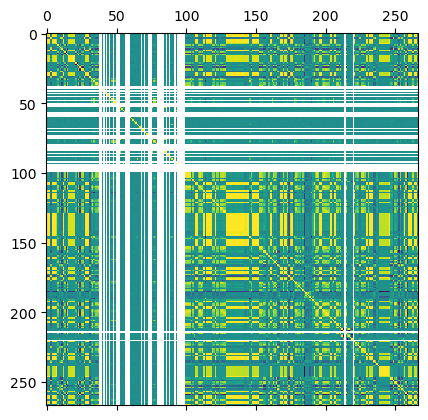

In [27]:
plt.matshow(pd.DataFrame(X_train).corr())
plt.show()

In [28]:
transformers = MinMaxScaler()
X_scaled = transformers.fit_transform(X_train)

Boruta is build around `RandomForestClassifier` so first we need to instanciate the model

In [29]:
# define random forest classifier
forest = RandomForestClassifier(n_jobs=-1, 
                                class_weight=cwts(data), 
                                random_state=42, 
                                max_depth=5)


In [30]:
# define Boruta feature selection method
feat_selector = BorutaPy(forest, n_estimators='auto', verbose=2, random_state=0, max_iter=500)

# find all relevant features
# takes input in array format not as dataframe
feat_selector.fit(X_scaled, y_train) 

# check selected features
print(feat_selector.support_)

# check ranking of features
print(feat_selector.ranking_)

# call transform() on X to filter it down to selected features
X_filtered = feat_selector.transform(X_train)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	267
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	267
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	267
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	267
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	267
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	267
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	267
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	0
Tentative: 	38
Rejected: 	229
Iteration: 	9 / 100
Confirmed: 	2
Tentative: 	36
Rejected: 	229
Iteration: 	10 / 100
Confirmed: 	2
Tentative: 	36
Rejected: 	229
Iteration: 	11 / 100
Confirmed: 	2
Tentative: 	36
Rejected: 	229
Iteration: 	12 / 100
Confirmed: 	2
Tentative: 	22
Rejected: 	243
Iteration: 	13 / 100
Confirmed: 	2
Tentative: 	22
Rejected: 	243
Iteration: 	14 / 100
Confirmed: 	2
Tentative: 	22
Rejected: 	243
Iteration: 	15 / 100
Confirmed: 	2
Tentative: 	22
Rejected: 	243
Iteration: 	16 / 100
Confirmed: 	2
Tentat

In [37]:
# zip my names, ranks, and decisions in a single iterable
feature_ranks = list(zip(feature_names, 
                         feat_selector.ranking_, 
                         feat_selector.support_))

# iterate through and print out the results
for feat in feature_ranks:
    print(f'Feature: {feat[0]:<30} Rank: {feat[1]:<5} Keep: {feat[2]}')

Feature: ABER_ZG_5_15                   Rank: 165   Keep: False
Feature: ABER_SG_5_15                   Rank: 153   Keep: False
Feature: ABER_XG_5_15                   Rank: 113   Keep: False
Feature: ABER_ATR_5_15                  Rank: 52    Keep: False
Feature: ACCBL_20                       Rank: 85    Keep: False
Feature: ACCBM_20                       Rank: 100   Keep: False
Feature: ACCBU_20                       Rank: 137   Keep: False
Feature: AD                             Rank: 54    Keep: False
Feature: ADOSC_3_10                     Rank: 63    Keep: False
Feature: ADX_14                         Rank: 49    Keep: False
Feature: DMP_14                         Rank: 81    Keep: False
Feature: DMN_14                         Rank: 1     Keep: True
Feature: ALMA_10_6.0_0.85               Rank: 129   Keep: False
Feature: AMATe_LR_8_21_2                Rank: 185   Keep: False
Feature: AMATe_SR_8_21_2                Rank: 180   Keep: False
Feature: AO_5_34                        R

In [39]:
selected_rf_features = pd.DataFrame({'Feature':feature_names,
                                     'Ranking':feat_selector.ranking_})

# selected_rf_features#.sort_values(by='Ranking') 

selected_rf_features[selected_rf_features['Ranking']==1]

,Feature,Ranking
11,DMN_14,1
32,BBP_5_2.0,1
104,CFO_9,1
110,CMO_14,1
156,KST_10_15_20_30_10_10_10_15,1
174,NATR_14,1
180,PPO_12_26_9,1
193,QQE_14_5_4.236,1
199,RSI_14,1
253,UI_14,1


In [40]:
# check the shape 
X_filtered.shape

(4486, 11)

In [34]:
# fit with selected features
forest.fit(X_filtered, y_train)

RandomForestClassifier(class_weight={0: 0.8196433791289096,
                                     1: 1.2821216278006402},
                       max_depth=5, n_estimators=500, n_jobs=-1,
                       random_state=RandomState(MT19937) at 0x12EBF8F40)

In [35]:
# first apply feature selector transform to make sure same features are selected
X_test_filtered = feat_selector.transform(X_test)
X_test_filtered

array([[ 1.53765055e+02,  3.82496227e-01,  3.24515825e-01, ...,
         4.97867324e+01,  1.16069351e+00, -7.82998317e+01],
       [ 2.41781837e+02,  4.06889735e-02, -7.60982119e-01, ...,
         3.75869444e+01,  1.48818350e+00, -9.65815029e+01],
       [ 2.52611803e+02,  2.26200091e-01, -1.91536321e-01, ...,
         3.89944136e+01,  1.73605536e+00, -8.42810138e+01],
       ...,
       [ 2.66713812e+02,  7.84956394e-01,  8.40302128e-01, ...,
         5.68348271e+01,  2.43176359e+00, -3.28205685e+01],
       [ 2.47662825e+02,  7.53511912e-01,  2.96146838e-01, ...,
         5.87519313e+01,  2.42614362e+00, -1.41916823e+01],
       [ 2.59272428e+02,  5.12140648e-01, -6.26142859e-01, ...,
         5.40409912e+01,  2.40261214e+00, -2.90747086e+01]])

In [36]:
# check the shape
X_test_filtered.shape

(1122, 11)

In [48]:
from sklearn.pipeline import make_pipeline
xgb = make_pipeline(MinMaxScaler(),XGBClassifier(scale_pos_weight=(class_weight[0]/class_weight[1])))

In [49]:
xgb.fit(X_filtered,y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               gamma=0, gpu_id=-1, grow_policy='depthwise',
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.300000012, max_bin=256,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=6, max_leaves=0, min_child_weight=1,
                               missing=nan, monotone_constraints='()',
                               n_estimators=100, n_jobs=0, num_parallel_tree=1,
                               predictor='auto', random_state=0, reg_alpha=0,
                               reg_lambda=1, ...))])

In [50]:
# predict labels with unseen dataset
prediction = xgb.predict(X_test_filtered)

In [51]:
# print scores
print("Accuracy Score \t\t", accuracy_score(y_test, prediction))

Accuracy Score 		 0.5918003565062389


In [52]:
# Classification Report
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.63      0.83      0.71       691
           1       0.43      0.21      0.28       431

    accuracy                           0.59      1122
   macro avg       0.53      0.52      0.50      1122
weighted avg       0.55      0.59      0.55      1122



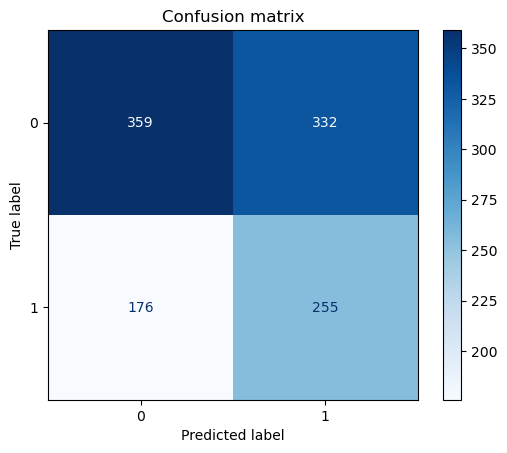

In [53]:
# Display confussion matrix
disp = ConfusionMatrixDisplay.from_estimator(
        forest,
        X_test_filtered,
        y_test,
        display_labels=forest.classes_,
        cmap=plt.cm.Blues
    )   
disp.ax_.set_title('Confusion matrix')
plt.show()

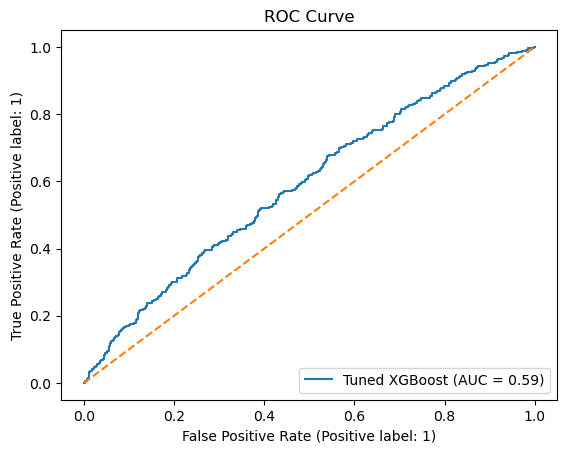

In [54]:
# plot roc# Display ROCCurve
disp_roc = RocCurveDisplay.from_estimator(
        forest,
        X_test_filtered,
        y_test,
        name='Tuned XGBoost')
disp_roc.ax_.set_title('ROC Curve')
plt.plot([0,1], [0,1], linestyle='--')
plt.show()